## Custom Transformers for Pre-Processing
**Custom Transformers** will conduct the following pre-processing:
- [Missing values and imputation](#Missing-values-and-imputation)
    - `Remove_MissingFeatures`
        - Identify missing percentages of features.
        - Remove features with missing % >= threshold missing %.
        - **Note**: Be applied prior to **any missing value imputation**.
- [Zero/near-zero variance features](#Zero/near-zero-variance-features)
    - `Remove_ConstantFeatures`
        - Identify features with a single unique value.
        - Remove those constant features.
- [Duplicate/highly correlated features](#Duplicate/highly-correlated-features)
    - `Remove_CorrelatedFeatures`
        - Compute pairwise correlation between features.
        - Remove features with abs(correlation) >= threshold correlation.
        - **Note**: Relevant to **numerical features only**.
    - `Remove_DuplicateFeatures`
        - Identify features with duplicate columns.
        - Remove features with duplicate columns.
- [Data Type Conversion](#Data-Type-Conversion)
    - `Use_DefaultDataType`
        - Identify features having data types inconsistent with default data types.
        - Convert the data types into the default data types if inconsistent.
        - **Note**: No feature removed!
- [Default Imputation](#Default-Imputation)
    - `Use_DefaultImputer`
        - Use default imputation values.
        - **Note**: No feature removed!        
- Extreme values/outliers (**TBD if necessary**)
    - How to define extreme values
    - How to replace extreme values
- Non-informative features (**TBD if necessary**)
    - Identify non-informative features
    - Decide which one be dropped        

## Custom Transformers: Parameters, Methods and Attributes
### Parameters
#### Common Parameters
All Custom Transformers require a pandas dataframe (df) that consist of all features:
- **X**: a df with all possible features
    - e.g.: Remove_DuplicateFeatures().fit(X)

#### Additional Parameters
Custom Transformers may require additional parameters with respect to their purpose:
- **Transformer specific parameter(s)** such as 'correlation_threshold'
    - default:
        - Remove_MissingFeatures(**missing_threshold=0.99**)
        - Remove_ConstantFeatures(**unique_threshold=1**)
        - Remove_CorrelatedFeatures(**correlation_threshold=0.90**)
    - e.g.: Remove_CorrelatedFeatures(correlation_threshold=0.99).fit(X)        
- **y**: a pandas series that represent a churn status: 
    - default = None
    - e.g.: Remove_CorrelatedFeatures(correlation_threshold=0.99).fit(X, y)

### Methods
#### Common Methods
All Custom Transformers have the same methods as **any other sklearn transformers**:
- **fit**: CustomTransformer().fit()
- **transform**: CustomTransformer().transform()
- **fit_transform**: CustomTransformer().fit_transform()

#### Additional Methods
Some Custom Transformers have additional methods as below:
- **plot**: CustomTransformer().plot() 

### Attributes
#### Common Attributes
All Custom Transformers have the below attributes:
- **summary_dropped_**: CustomTransformer().fit().summary_dropped_
    - a df that includes dropped features with ***simple*** summary statistics 
- **summary_dropped_NUM_**: CustomTransformer().fit().summary_dropped_NUM_
    - a df that includes dropped **Numerical** features with ***full*** summary statistics 
- **summary_dropped_CAT_**: CustomTransformer().fit().summary_dropped_CAT_
    - a df that includes dropped **Categorical** features with ***full*** summary statistics 
- **features_dropped_**: CustomTransformer().fit().features_dropped_
    - a list of dropped features
- **features_kept_**: CustomTransformer().fit().features_kept_
    - a list of kept features

#### Additional Attributes
Some Custom Transformers have additional attributes as below:
- **features_irrelevant (Class Attribute)**: , CustomTransformer().features_irrelevant
    - a list of irrelevant features that are pre-excluded before pre-processing
- `Use_DefaultImputer` has the following attributes:
    - **summary_imputation_**: Use_DefaultImputer.fit().summary_imputation_
    - **summary_imputation_NUM_**: Use_DefaultImputer.fit().summary_imputation_NUM_
    - **summary_imputation_CAT_**: Use_DefaultImputer.fit().summary_imputation_CAT_
- `Use_DefaultDataType` has the following attributes:
    - **summary_inconsistent_dtypes_**: Use_DefaultDataType.fit().summary_inconsistent_dtypes_
    - **summary_inconsistent_NUM_**: Use_DefaultDataType.fit().summary_inconsistent_NUM_
    - **summary_inconsistent_CAT_**: Use_DefaultDataType.fit().summary_inconsistent_CAT_
    - **features_inconsistent_dtypes_**: Use_DefaultDataType.fit().features_inconsistent_dtypes_
    - **features_inconsistent_NUM_**: Use_DefaultDataType.fit().features_inconsistent_NUM_
    - **features_inconsistent_CAT_**: Use_DefaultDataType.fit().features_inconsistent_CAT_

## Things You Need to Do
### Data: Your Own TRAIN/TEST
- Create Your Own TRAIN/TEST datasets from a master churn data file.

### Dictionary: Default Data Type and Imputation Values
- Import default data type and imputation value dictionaries.

### 0. Create Sample Data

In [1]:
### 0. Import Required Packages
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

# Import Custom Transformers Here!!!
import PreProcessing_Custom_Transformers as PP           ### Import PreProcessing Customer Transformers

# Use the Updated Attribute/Imputation Dictionaries!!!
%run 'data_new/attribute_dictionary.py'
%run 'data_new/imputation_dictionary.py'

In [2]:
df_train = pd.read_pickle('data_new/df_train_Fios ONT Competitive Area.pkl')
df_test  = pd.read_pickle('data_new/df_test_Fios ONT Competitive Area.pkl')
# df_train = pd.read_pickle('data_new/sample_train.pkl')
# df_test  = pd.read_pickle('data_new/sample_test.pkl')

# TRAIN
train_X = df_train.drop('status', axis=1).copy()
train_y = df_train['status']

# TEST
test_X  = df_test.drop('status', axis=1).copy()
test_y  = df_test['status']

# Sample Size
print('*'*50 + '\nTRAIN vs TEST Datasets\n' + '*'*50)
print('Competitive Area: ', df_train.competitive_area.unique())
print('The Shape of TRAIN Data: ' + str(df_train.shape))
print('The Shape of TEST Data:  ' + str(df_test.shape))

## Churn Rate by Sample Type
print('\n' + '*'*50 + '\nOverall Churn Rate\n' + '*'*50)
print('TRAIN: ', df_train.status.value_counts(normalize=True)[1].round(4))
print('TEST:  ', df_test.status.value_counts(normalize=True)[1].round(4), '\n')

**************************************************
TRAIN vs TEST Datasets
**************************************************
Competitive Area:  ['Fios ONT Competitive Area']
The Shape of TRAIN Data: (126928, 1018)
The Shape of TEST Data:  (123820, 1018)

**************************************************
Overall Churn Rate
**************************************************
TRAIN:  0.0199
TEST:   0.0258 



### Missing values and imputation
- Use `Remove_MissingFeatures`.

**************************************************
Pre-Processing: Remove_MissingFeatures
**************************************************
- It will remove features with a high missing pct.

22 features with greater than 99.0% missing values

**************************************************
Features Dropped Due to High Mising Pct
**************************************************
 ['ddp_recurring_m1', 'espanol_save_offer_lift_amount', 'espanol_save_offer_months_remaining', 'ooldown_m1', 'ooldown_m2', 'ooldown_m3', 'other_offer_lift_amount', 'other_offer_months_remaining', 'outage_m1', 'outage_ool_m1', 'outage_ov_m1', 'outage_vid_m1', 'portout_m1', 'portout_m2', 'portout_m3', 'portout_m4', 'premium_offer_lift_amount', 'premium_offer_months_remaining', 'tcs_m1', 'viddown_m1', 'viddown_m2', 'viddown_m3']
None

**************************************************
Before vs After Transformation
**************************************************
TRAIN: Before Transformation:(126928, 1017)


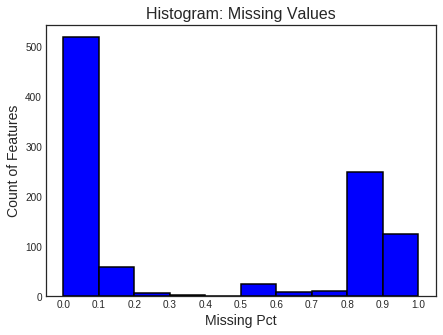

In [3]:
# (1) Instantiate
PP_Missing = PP.Remove_MissingFeatures(missing_threshold=0.99)


# (2) fit()
# default: y=None
PP_Missing.fit(train_X, train_y)

# list
print('\n' + '*'*50 + '\nFeatures Dropped Due to High Mising Pct\n' + '*'*50 + '\n', 
      PP_Missing.features_dropped_)

# dataframe
summary_dropped_Mssing     = PP_Missing.summary_dropped_
summary_dropped_Mssing_NUM = PP_Missing.summary_dropped_NUM_
summary_dropped_Mssing_CAT = PP_Missing.summary_dropped_CAT_


# (3) plot
print(PP_Missing.plot())


# (4) transform()
train_X_Missing = PP_Missing.transform(train_X)
test_X_Missing  = PP_Missing.transform(test_X)

# Feature Dimension
print('\n' + '*'*50 + '\nBefore vs After Transformation\n' + '*'*50)
print('TRAIN: Before Transformation:' + str(train_X.shape))
print('TRAIN: After Transformation: ' + str(train_X_Missing.shape))
print('TEST:  After Transformation: ' + str(test_X_Missing.shape))

In [4]:
summary_dropped_Mssing.tail()

,feature,missing_pct
17,espanol_save_offer_lift_amount,0.991822
18,espanol_save_offer_months_remaining,0.991822
19,other_offer_months_remaining,0.990585
20,other_offer_lift_amount,0.990585
21,tcs_m1,0.990010


In [5]:
summary_dropped_Mssing_NUM.tail()

,feature,missing_pct,churn_rate,count,mean,std,min,25%,50%,75%,max
17,espanol_save_offer_lift_amount,0.991822,0.0202,1038.0,6.340077,0.233321,6.0,6.0,6.5,6.5,6.5
18,espanol_save_offer_months_remaining,0.991822,0.0202,1038.0,0.507707,4.320506,-6.0,-4.0,1.0,4.0,7.0
19,other_offer_months_remaining,0.990585,0.0234,1195.0,0.298745,4.387086,-6.0,-4.0,1.0,4.0,7.0
20,other_offer_lift_amount,0.990585,0.0234,1195.0,10.877741,9.245391,0.0,5.0,10.0,18.0,85.0
21,tcs_m1,0.990010,0.0268,1268.0,1.057571,0.270632,1.0,1.0,1.0,1.0,4.0


In [6]:
summary_dropped_Mssing_CAT

,feature,missing_pct


### Zero/near-zero variance features
- `Remove_ConstantFeatures`

**************************************************
Pre-Processing: Remove_ConstantFeatures
**************************************************
- It will remove features with 1 unique value(s).

30 features with 1 or fewer unique value(s)

**************************************************
Features Dropped Due to Zero Variance
**************************************************
 ['commprod_ind', 'curr_addl_did_blocks', 'curr_sip_sessions', 'curr_tf_lines', 'fiosont', 'gf_mig', 'mover', 'music_choice_m1', 'music_choice_m2', 'ool4b_flag', 'ov4b_flag', 'range_extend_m1', 'range_extend_m2', 'rewindbuf_chrg_m1', 'rewindbuf_chrg_m2', 'rsdvr_160free_m1', 'rsdvr_160free_m2', 'rsdvr_160pay_m1', 'rsdvr_160pay_m2', 'rsdvr_160promo_m1', 'rsdvr_160promo_m2', 'rsdvr_plus_pay_m1', 'static_ip_m1', 'static_ip_m2', 'tollfree_m1', 'tollfree_m2', 'trump', 'uversezip', 'virtual_recep_m1', 'virtual_recep_m2']
None

**************************************************
Before vs After Transformation
**************

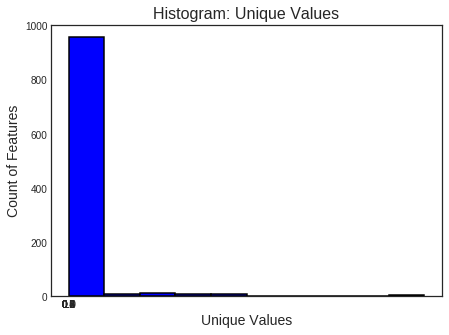

In [7]:
# (1) Instantiate
# default unique_threshold=1
# default missing_threshold=0.00     
#  - missing_threshold=0.00 --> Focus on features with full non-missing values.
PP_Constant = PP.Remove_ConstantFeatures(unique_threshold=1, missing_threshold=0.00)


# (2) fit()
# default: y=None
PP_Constant.fit(train_X, train_y)

# list
print('\n' + '*'*50 + '\nFeatures Dropped Due to Zero Variance\n' + '*'*50 + '\n', 
      PP_Constant.features_dropped_)

# dataframe
summary_dropped_Constant     = PP_Constant.summary_dropped_
summary_dropped_Constant_NUM = PP_Constant.summary_dropped_NUM_
summary_dropped_Constant_CAT = PP_Constant.summary_dropped_CAT_


# (3) plot
print(PP_Constant.plot())


# (4) transform()
train_X_Constant = PP_Constant.transform(train_X)
test_X_Constant  = PP_Constant.transform(test_X)

# Feature Dimension
print('\n' + '*'*50 + '\nBefore vs After Transformation\n' + '*'*50)
print('TRAIN: Before Transformation:' + str(train_X.shape))
print('TRAIN: After Transformation: ' + str(train_X_Constant.shape))
print('TEST:  After Transformation: ' + str(test_X_Constant.shape))

In [8]:
summary_dropped_Constant.tail()

,feature,nunique,missing_pct
25,rsdvr_160promo_m2,1,0.0
26,gf_mig,1,0.0
27,fiosont,1,0.0
28,uversezip,1,0.0
29,rsdvr_160pay_m2,1,0.0


In [9]:
summary_dropped_Constant_NUM.tail()

,feature,nunique,missing_pct,churn_rate,count,mean,std,min,25%,50%,75%,max
17,rsdvr_160free_m2,1,0.0,0.0199,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,rsdvr_160pay_m1,1,0.0,0.0199,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,rsdvr_160promo_m1,1,0.0,0.0199,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,rsdvr_160promo_m2,1,0.0,0.0199,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,rsdvr_160pay_m2,1,0.0,0.0199,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
summary_dropped_Constant_CAT.tail()

,feature,nunique,missing_pct,churn_rate,count,unique,top,freq
3,ool4b_flag,1,0.0,0.0199,126928,1,N,126928
4,mover,1,0.0,0.0199,126928,1,,126928
5,gf_mig,1,0.0,0.0199,126928,1,,126928
6,fiosont,1,0.0,0.0199,126928,1,Y,126928
7,uversezip,1,0.0,0.0199,126928,1,,126928


### Highly correlated features
- `Remove_CorrelatedFeatures`
- If possible, use `Remove_CorrelatedFeatures` after `Remove_MissingFeatures` and `Remove_ConstantFeatures` are applied.

In [11]:
# (1) Instantiate
# default correlation_threshold=0.90    
PP_Correlated = PP.Remove_CorrelatedFeatures(correlation_threshold=0.99)


# (2) fit()
# default: y=None
# Note: data = train_X_Missing
PP_Correlated.fit(train_X, train_y)

# list
print('\n' + '*'*50 + '\nFeatures Dropped Due to Multicollinearity\n' + '*'*50 + '\n', 
      PP_Correlated.features_dropped_)

# dataframe
summary_dropped_Correlated     = PP_Correlated.summary_dropped_


# (3) transform()
train_X_Correlated = PP_Correlated.transform(train_X)
test_X_Correlated  = PP_Correlated.transform(test_X)

# Feature Dimension
print('\n' + '*'*50 + '\nBefore vs After Transformation\n' + '*'*50)
print('TRAIN: Before Transformation:' + str(train_X.shape))
print('TRAIN: After Transformation: ' + str(train_X_Correlated.shape))
print('TEST:  After Transformation: ' + str(test_X_Correlated.shape))


**************************************************
Pre-Processing: Remove_CorrelatedFeatures
**************************************************
- It will work on Numerical Features Only, doing nothing on Categorical Features.

- It may take 10+ minutes. Be patient!

114 features with abs(correlation ) > 0.99 with other features

**************************************************
Features Dropped Due to Multicollinearity
**************************************************
 ['acu_email_num_of_logins_m2', 'acu_int_usage_calls_edp_m2', 'acu_voicemail_ret_succ_cnt_m2', 'acu_wifi_usage_up_mb_m2', 'analog_m2', 'analog_m3', 'analog_m4', 'anarev_m3', 'anarev_m4', 'box_m2', 'box_m3', 'box_m4', 'boxswap_diff_m4', 'center_payments_6m', 'check_payments_6m', 'dig_ant_m2', 'dig_ant_m3', 'dig_ant_m4', 'geninfo_m1', 'ioequip_m2', 'ioequip_m4', 'mb_total_usage1', 'mb_total_usage2', 'mbreceived_m2', 'ool_offer_stepup_flag_m2', 'ool_offer_stepup_flag_m3', 'ool_offer_stepup_flag_m4', 'other_othrrev_m3', 'ot

In [12]:
summary_dropped_Correlated.head(n=20)

,drop_feature,corr_feature,pairwise_corr,corr_DF_target,corr_CF_target
0,acu_email_num_of_logins_m2,emaildays_m2,1.000000,-0.032040,-0.032040
1,acu_int_usage_calls_edp_m2,acu_int_usage_min_edp_m2,0.991536,-0.001658,-0.001772
2,acu_voicemail_ret_succ_cnt_m2,espanol_save_offer_lift_amount,-1.000000,0.000379,-0.048168
3,acu_wifi_usage_up_mb_m2,mbsent_m2,0.999959,-0.003281,-0.003298
4,analog_m2,analog_m1,0.998512,0.000662,0.000733
5,analog_m3,analog_m1,0.998507,0.000646,0.000733
6,analog_m3,analog_m2,0.997026,0.000646,0.000662
7,analog_m3,analog_m4,0.994073,0.000646,0.000658
8,analog_m4,analog_m1,0.997043,0.000658,0.000733
9,analog_m4,analog_m2,0.994073,0.000658,0.000662


### Duplicate features
- `Remove_DuplicateFeatures`
- If possible, use `Remove_DuplicateFeatures` after all other custom transformers are applied.

In [13]:
# (1) Instantiate
PP_Duplicate = PP.Remove_DuplicateFeatures()


# (2) fit()
# default: y=None
# Note: now X = 'train_X_Correlated', not 'train_X' to save running time
PP_Duplicate.fit(train_X_Correlated, train_y)

# list
print('\n' + '*'*50 + '\nFeatures Dropped Due to Duplicate Columns\n' + '*'*50 + '\n', 
      PP_Duplicate.features_dropped_)

# dataframe
summary_dropped_Duplicate     = PP_Duplicate.summary_dropped_
summary_dropped_Duplicate_NUM = PP_Duplicate.summary_dropped_NUM_
summary_dropped_Duplicate_CAT = PP_Duplicate.summary_dropped_CAT_

# (3) transform()
train_X_Duplicate = PP_Duplicate.transform(train_X_Correlated)
test_X_Duplicate  = PP_Duplicate.transform(test_X_Correlated)

# Feature Dimension
print('\n' + '*'*50 + '\nBefore vs After Transformation\n' + '*'*50)
print('TRAIN: Before Transformation:' + str(train_X_Correlated.shape))
print('TRAIN: After Transformation: ' + str(train_X_Duplicate.shape))
print('TEST:  After Transformation: ' + str(test_X_Duplicate.shape))

**************************************************
Pre-Processing: Remove_DuplicateFeatures
**************************************************
- It may take 10+ minutes. Be patient!

'census' is the same as 'node'

'commprod_ind' is the same as 'ool4b_flag'

'commprod_ind' is the same as 'ov4b_flag'

'commprod_ind' is the same as 'trump'

'curr_addl_did_blocks' is the same as 'curr_sip_sessions'

'curr_addl_did_blocks' is the same as 'curr_tf_lines'

'curr_addl_did_blocks' is the same as 'music_choice_m1'

'curr_addl_did_blocks' is the same as 'music_choice_m2'

'curr_addl_did_blocks' is the same as 'range_extend_m1'

'curr_addl_did_blocks' is the same as 'range_extend_m2'

'curr_addl_did_blocks' is the same as 'rewindbuf_chrg_m1'

'curr_addl_did_blocks' is the same as 'rewindbuf_chrg_m2'

'curr_addl_did_blocks' is the same as 'rsdvr_160free_m1'

'curr_addl_did_blocks' is the same as 'rsdvr_160free_m2'

'curr_addl_did_blocks' is the same as 'rsdvr_160pay_m1'

'curr_addl_did_blocks' is 

In [14]:
summary_dropped_Duplicate.head(n=20)

,drop_feature,duplicate_feature
0,node,census
1,ool4b_flag,commprod_ind
2,ov4b_flag,commprod_ind
3,trump,commprod_ind
4,curr_sip_sessions,curr_addl_did_blocks
5,curr_tf_lines,curr_addl_did_blocks
6,music_choice_m1,curr_addl_did_blocks
7,music_choice_m2,curr_addl_did_blocks
8,range_extend_m1,curr_addl_did_blocks
9,range_extend_m2,curr_addl_did_blocks


In [15]:
summary_dropped_Duplicate_NUM.head(n=20)

,drop_feature,duplicate_feature,count_drop,mean_drop,std_drop,min_drop,25%_drop,50%_drop,75%_drop,max_drop,count_duplicate,mean_duplicate,std_duplicate,min_duplicate,25%_duplicate,50%_duplicate,75%_duplicate,max_duplicate
4,curr_sip_sessions,curr_addl_did_blocks,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,curr_tf_lines,curr_addl_did_blocks,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,music_choice_m1,curr_addl_did_blocks,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,music_choice_m2,curr_addl_did_blocks,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,range_extend_m1,curr_addl_did_blocks,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,range_extend_m2,curr_addl_did_blocks,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,rewindbuf_chrg_m1,curr_addl_did_blocks,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,rewindbuf_chrg_m2,curr_addl_did_blocks,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,rsdvr_160free_m1,curr_addl_did_blocks,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,rsdvr_160free_m2,curr_addl_did_blocks,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
summary_dropped_Duplicate_CAT.head(n=20)

,drop_feature,duplicate_feature,count_drop,unique_drop,top_drop,freq_drop,count_duplicate,unique_duplicate,top_duplicate,freq_duplicate
0,node,census,126928,9167,,25339,126928,9167,,25339
1,ool4b_flag,commprod_ind,126928,1,N,126928,126928,1,N,126928
2,ov4b_flag,commprod_ind,126928,1,N,126928,126928,1,N,126928
3,trump,commprod_ind,126928,1,N,126928,126928,1,N,126928
103,ov4b_flag,ool4b_flag,126928,1,N,126928,126928,1,N,126928
104,trump,ool4b_flag,126928,1,N,126928,126928,1,N,126928
105,trump,ov4b_flag,126928,1,N,126928,126928,1,N,126928
64,mover,gf_mig,126928,1,,126928,126928,1,,126928
65,uversezip,gf_mig,126928,1,,126928,126928,1,,126928
66,uversezip,mover,126928,1,,126928,126928,1,,126928


### Data Type Conversion
- `Use_DefaultDataType`

In [17]:
# (1) Instantiate
# - Use 'attribute_dict' as default_dtypes
PP_DataType = PP.Use_DefaultDataType(default_dtypes=attribute_dict)


# (2) fit()
PP_DataType.fit(df_train)

# list
print('\n' + '*'*50 + '\nFeatures with Inconsistent Data Types\n' + '*'*50 + '\n', 
      PP_DataType.features_inconsistent_dtypes_)
print('\n' + '*'*50 + '\nNUM Features with Inconsistent Data Types\n' + '*'*50 + '\n', 
      PP_DataType.features_inconsistent_NUM_)
print('\n' + '*'*50 + '\nCAT Features with Inconsistent Data Types\n' + '*'*50 + '\n', 
      PP_DataType.features_inconsistent_CAT_)

# dataframe
summary_inconsistent_All = PP_DataType.summary_inconsistent_dtypes_
summary_inconsistent_NUM = PP_DataType.summary_inconsistent_NUM_
summary_inconsistent_CAT = PP_DataType.summary_inconsistent_CAT_


# (3) transform()
df_train_DataType = PP_DataType.transform(df_train)
df_test_DataType  = PP_DataType.transform(df_test)

tbl_DataType_TRAIN = pd.concat([df_train.dtypes.value_counts(), df_train_DataType.dtypes.value_counts()], axis=1).\
                     reset_index().rename(columns = {'index': 'dtypes', 0: 'Before', 1: 'After'})
print('\n' + '*'*50 + '\nTRAIN: Data Type Conversion\n' + '*'*50 + '\n', tbl_DataType_TRAIN)

tbl_DataType_TEST = pd.concat([df_test.dtypes.value_counts(), df_test_DataType.dtypes.value_counts()], axis=1).\
                    reset_index().rename(columns = {'index': 'dtypes', 0: 'Before', 1: 'After'})
print('\n' + '*'*50 + '\nTEST: Data Type Conversion\n' + '*'*50 + '\n', tbl_DataType_TEST)

**************************************************
Pre-Processing: Use_DefaultDataType
**************************************************
- It will convert data types into default ones.


**************************************************
Features with Inconsistent Data Types
**************************************************
 ['cust', 'roll_off_lift_m1', 'roll_off_lift_m2', 'roll_off_lift_m3', 'roll_off_lift_m4', 'vidpromo_mthsleft_m1', 'vidpromo_mthsleft_m2', 'vidpromo_mthsleft_m3', 'vidpromo_mthsleft_m4', 'corp', 'ddp_recurring_m1', 'dig_ant_m1', 'dig_ant_m2', 'dig_ant_m3', 'dig_ant_m4', 'homenet_router_m1', 'homenet_router_m2', 'managed_router_m1', 'managed_router_m2', 'music_choice_m1', 'music_choice_m2', 'no_oolsvc_m1', 'no_oolsvc_m2', 'ool_offer_stepup_flag_m1', 'ool_offer_stepup_flag_m2', 'ool_offer_stepup_flag_m3', 'ool_offer_stepup_flag_m4', 'ooldown_m1', 'ooldown_m2', 'ooldown_m3', 'ordisc_m1', 'ordisc_m2', 'ordisc_m3', 'ordisc_m4', 'ov_offer_stepup_flag_m1', 'ov_offer_stepu

### Default Imputation
- `Use_DefaultImputer`

In [18]:
# (1) Instantiate
# - Use 'attribute_imputer_dict' as default_imputers
# - Use 'attribute_dict' as default_dtypes
PP_Imputer = PP.Use_DefaultImputer(default_imputers=attribute_imputer_dict, default_dtypes=attribute_dict)


# (2) fit()
PP_Imputer.fit(df_train)

# dataframe
summary_imputation     = PP_Imputer.summary_imputation_
summary_imputation_NUM = PP_Imputer.summary_imputation_NUM_
summary_imputation_CAT = PP_Imputer.summary_imputation_CAT_


# (3) transform()
df_train_Imputer = PP_Imputer.transform(df_train)
df_test_Imputer  = PP_Imputer.transform(df_test)

**************************************************
Pre-Processing: Use_DefaultImputere
**************************************************
- It will append default imputation values to missings.



In [19]:
summary_imputation.head(n=20)

,feature,default_imputation_value,missing_pct_before_imputation,missing_pct_after_imputation
0,account_pend_disco_frq,N,0.000000,0.0
1,acctrel_cos_m1,0,0.856486,0.0
2,acctrel_cos_m2,0,0.825358,0.0
3,acctrel_cos_m3,0,0.850695,0.0
4,acctrel_cos_m4,0,0.840350,0.0
5,acctrel_cos_m5,0,0.839815,0.0
6,acctrel_cos_m6,0,0.841832,0.0
7,acctrel_disco_m1,0,0.856486,0.0
8,acctrel_disco_m2,0,0.825358,0.0
9,acctrel_disco_m3,0,0.850695,0.0


In [20]:
summary_imputation_NUM.head(n=20)

,feature,default_imputation_value,missing_pct_before_imputation,missing_pct_after_imputation,count_before,mean_before,std_before,min_before,25%_before,50%_before,75%_before,max_before,count_after,mean_after,std_after,min_after,25%_after,50%_after,75%_after,max_after
0,acctrel_cos_m1,0,0.856486,0.0,18216.0,0.071256,0.275399,0.0,0.0,0.0,0.0,4.0,126928.0,0.010226,0.107277,0.0,0.0,0.0,0.0,4.0
1,acctrel_cos_m2,0,0.825358,0.0,22167.0,0.086615,0.294901,0.0,0.0,0.0,0.0,3.0,126928.0,0.015127,0.127549,0.0,0.0,0.0,0.0,3.0
2,acctrel_cos_m3,0,0.850695,0.0,18951.0,0.075036,0.275403,0.0,0.0,0.0,0.0,3.0,126928.0,0.011203,0.109722,0.0,0.0,0.0,0.0,3.0
3,acctrel_cos_m4,0,0.840350,0.0,20264.0,0.078711,0.281129,0.0,0.0,0.0,0.0,3.0,126928.0,0.012566,0.115967,0.0,0.0,0.0,0.0,3.0
4,acctrel_cos_m5,0,0.839815,0.0,20332.0,0.081546,0.287698,0.0,0.0,0.0,0.0,3.0,126928.0,0.013063,0.118965,0.0,0.0,0.0,0.0,3.0
5,acctrel_cos_m6,0,0.841832,0.0,20076.0,0.094292,0.307685,0.0,0.0,0.0,0.0,4.0,126928.0,0.014914,0.127110,0.0,0.0,0.0,0.0,4.0
6,acctrel_disco_m1,0,0.856486,0.0,18216.0,0.050560,0.231293,0.0,0.0,0.0,0.0,3.0,126928.0,0.007256,0.089394,0.0,0.0,0.0,0.0,3.0
7,acctrel_disco_m2,0,0.825358,0.0,22167.0,0.060134,0.257946,0.0,0.0,0.0,0.0,4.0,126928.0,0.010502,0.110185,0.0,0.0,0.0,0.0,4.0
8,acctrel_disco_m3,0,0.850695,0.0,18951.0,0.049127,0.226160,0.0,0.0,0.0,0.0,3.0,126928.0,0.007335,0.089123,0.0,0.0,0.0,0.0,3.0
9,acctrel_disco_m4,0,0.840350,0.0,20264.0,0.048658,0.226771,0.0,0.0,0.0,0.0,3.0,126928.0,0.007768,0.092343,0.0,0.0,0.0,0.0,3.0


In [21]:
summary_imputation_CAT.head(n=20)

,feature,default_imputation_value,missing_pct_before_imputation,missing_pct_after_imputation,count_before,unique_before,top_before,freq_before,count_after,unique_after,top_after,freq_after
0,account_pend_disco_frq,N,0.000000,0.0,126928,2,N,116523,126928,2,N,116523
1,age,Unknown,0.001670,0.0,126716,4,Working Years (35-54),55321,126928,5,Working Years (35-54),55321
2,age_demos,Unknown,0.156136,0.0,107110,7,45-54,23963,126928,8,45-54,23963
3,anydvrbox,Unknown,0.000000,0.0,126928,2,N,125366,126928,2,N,125366
4,archetype,Unknown,0.000930,0.0,126810,9,Empty Nesters,36059,126928,9,Empty Nesters,36059
5,archetype_grp,Unknown,0.000000,0.0,126928,5,Indulgent Empty Nesters,55627,126928,5,Indulgent Empty Nesters,55627
6,baserev_grp_m2,None,0.000110,0.0,126914,10,$100-$125,37799,126928,11,$100-$125,37799
7,baserev_grp2_m2,None,0.000110,0.0,126914,42,$95-$100,11994,126928,43,$95-$100,11994
8,bill_sub_m1,N,0.000000,0.0,126928,2,N,118839,126928,2,N,118839
9,billdisp_sub_m1,N,0.000000,0.0,126928,2,N,120033,126928,2,N,120033


### Wrap-up: Create a Meta Custom Transfomer for Pre-Processing
- Use `Pipeline` to integrate all the above custom transformers

In [22]:
from sklearn.pipeline import Pipeline

# (1) Make a Pipeline and Instantiate
PP_Pipe = Pipeline([
                    ('DataType', PP.Use_DefaultDataType(default_dtypes=attribute_dict)),
                    ('Missing', PP.Remove_MissingFeatures(missing_threshold=0.99)), 
                    ('Constant', PP.Remove_ConstantFeatures(unique_threshold=1, missing_threshold=0.00)), 
                    ('Correlated', PP.Remove_CorrelatedFeatures(correlation_threshold=0.99)), 
                    ('Duplicate', PP.Remove_DuplicateFeatures()),
                    ('Imputer', PP.Use_DefaultImputer(default_imputers=attribute_imputer_dict, default_dtypes=attribute_dict))
                  ])
                    

# (2) fit()
# default: y=None
PP_Pipe.fit(train_X, train_y)


# (3) transform()
train_X_Preprocessed = PP_Pipe.transform(train_X)
test_X_Preprocessed  = PP_Pipe.transform(test_X)

# Feature Dimension
print('\n' + '*'*50 + '\nBefore vs After Transformation\n' + '*'*50)
print('TRAIN: Before Transformation:' + str(train_X.shape))
print('TRAIN: After Transformation: ' + str(train_X_Preprocessed.shape))
print('TEST:  After Transformation: ' + str(test_X_Preprocessed.shape))
                     

**************************************************
Pre-Processing: Use_DefaultDataType
**************************************************
- It will convert data types into default ones.

**************************************************
Pre-Processing: Remove_MissingFeatures
**************************************************
- It will remove features with a high missing pct.

**************************************************
Pre-Processing: Remove_ConstantFeatures
**************************************************
- It will remove features with 1 unique value(s).

**************************************************
Pre-Processing: Remove_CorrelatedFeatures
**************************************************
- It will work on Numerical Features Only, doing nothing on Categorical Features.

- It may take 10+ minutes. Be patient!

**************************************************
Pre-Processing: Remove_DuplicateFeatures
**************************************************
- It may take 10+

In [23]:
# (4) Examine Attributes by Custom Transformer
# list of dropped features by Custom Transformer
print('\n' + '*'*50 + '\nFeatures Dropped Due to High Mising Pct\n' + '*'*50 + '\n', 
      PP_Pipe.named_steps['Missing'].features_dropped_)
print('\n' + '*'*50 + '\nFeatures Dropped Due to Zero Variance\n' + '*'*50 + '\n', 
      PP_Pipe.named_steps['Constant'].features_dropped_)
print('\n' + '*'*50 + '\nFeatures Dropped Due to Multicollinearity\n' + '*'*50 + '\n', 
      PP_Pipe.named_steps['Correlated'].features_dropped_)
print('\n' + '*'*50 + '\nFeatures Dropped Due to Duplicate Columns\n' + '*'*50 + '\n', 
      PP_Pipe.named_steps['Duplicate'].features_dropped_)


**************************************************
Features Dropped Due to High Mising Pct
**************************************************
 ['ddp_recurring_m1', 'espanol_save_offer_lift_amount', 'espanol_save_offer_months_remaining', 'gf_mig', 'hbo_svod', 'mover', 'ooldown_m1', 'ooldown_m2', 'ooldown_m3', 'other_offer_lift_amount', 'other_offer_months_remaining', 'outage_m1', 'outage_ool_m1', 'outage_ov_m1', 'outage_vid_m1', 'portout_m1', 'portout_m2', 'portout_m3', 'portout_m4', 'premium_offer_lift_amount', 'premium_offer_months_remaining', 'tcs_m1', 'uversezip', 'viddown_m1', 'viddown_m2', 'viddown_m3']

**************************************************
Features Dropped Due to Zero Variance
**************************************************
 ['commprod_ind', 'curr_addl_did_blocks', 'curr_sip_sessions', 'curr_tf_lines', 'fiosont', 'music_choice_m1', 'music_choice_m2', 'ool4b_flag', 'ov4b_flag', 'range_extend_m1', 'range_extend_m2', 'rewindbuf_chrg_m1', 'rewindbuf_chrg_m2', 'rsdvr

In [25]:
# Summary df
# Missing
print('\n' + '*'*50 + '\nMissing: Summary Tables\n' + '*'*50 + '\n')
print('Summary: Dropped Features\n', PP_Pipe.named_steps['Missing'].summary_dropped_.tail())
print('\n' + 'Summary: Dropped NUM Features\n', PP_Pipe.named_steps['Missing'].summary_dropped_NUM_.tail())
print('\n' + 'Summary: Dropped CAT Features\n', PP_Pipe.named_steps['Missing'].summary_dropped_CAT_.tail())


**************************************************
Missing: Summary Tables
**************************************************

Summary: Dropped Features
                                 feature  missing_pct
21  espanol_save_offer_months_remaining     0.991822
22       espanol_save_offer_lift_amount     0.991822
23         other_offer_months_remaining     0.990585
24              other_offer_lift_amount     0.990585
25                               tcs_m1     0.990010

Summary: Dropped NUM Features
                                 feature  missing_pct  churn_rate   count  \
10  espanol_save_offer_months_remaining     0.991822      0.0202  1038.0   
11       espanol_save_offer_lift_amount     0.991822      0.0202  1038.0   
12         other_offer_months_remaining     0.990585      0.0234  1195.0   
13              other_offer_lift_amount     0.990585      0.0234  1195.0   
14                               tcs_m1     0.990010      0.0268  1268.0   

         mean       std  min  25%   50

In [26]:
# Constant
print('\n' + '*'*50 + '\nConstant: Summary Tables\n' + '*'*50 + '\n')
print('Summary: Dropped Features\n', PP_Pipe.named_steps['Constant'].summary_dropped_.tail())
print('\n' + 'Summary: Dropped NUM Features\n', PP_Pipe.named_steps['Constant'].summary_dropped_NUM_.tail())
print('\n' + 'Summary: Dropped CAT Features\n', PP_Pipe.named_steps['Constant'].summary_dropped_CAT_.tail())


**************************************************
Constant: Summary Tables
**************************************************

Summary: Dropped Features
               feature  nunique  missing_pct
22   rsdvr_160free_m1        1          0.0
23    music_choice_m1        1          0.0
24    music_choice_m2        1          0.0
25  rewindbuf_chrg_m2        1          0.0
26              trump        1          0.0

Summary: Dropped NUM Features
                 feature  nunique  missing_pct  churn_rate     count  mean  \
0         curr_tf_lines        1          0.0      0.0199  126928.0   0.0   
1     curr_sip_sessions        1          0.0      0.0199  126928.0   0.0   
2  curr_addl_did_blocks        1          0.0      0.0199  126928.0   0.0   

   std  min  25%  50%  75%  max  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  

Summary: Dropped CAT Features
               feature  nunique  missing_pct  churn_rate   count unique 

In [27]:
# Correlated
print('\n' + '*'*50 + '\nCorrelated: Summary Table\n' + '*'*50 + '\n')
PP_Pipe.named_steps['Correlated'].summary_dropped_.head(n=20)


**************************************************
Correlated: Summary Table
**************************************************



,drop_feature,corr_feature,pairwise_corr,corr_DF_target,corr_CF_target
0,acu_int_usage_calls_edp_m2,acu_int_usage_min_edp_m2,0.991536,-0.001658,-0.001772
1,acu_wifi_usage_up_mb_m2,mbsent_m2,0.999959,-0.003281,-0.003298
2,analog_m2,analog_m1,0.998512,0.000662,0.000733
3,analog_m3,analog_m1,0.998507,0.000646,0.000733
4,analog_m3,analog_m2,0.997026,0.000646,0.000662
5,analog_m3,analog_m4,0.994073,0.000646,0.000658
6,analog_m4,analog_m1,0.997043,0.000658,0.000733
7,analog_m4,analog_m2,0.994073,0.000658,0.000662
8,anarev_m3,avg_anarev_m1_m6,0.990457,-0.013797,-0.014255
9,anarev_m4,avg_anarev_m1_m6,0.990583,-0.014032,-0.014255


In [28]:
# Duplicate
print('\n' + '*'*50 + '\nDuplicate: Summary Tables\n' + '*'*50 + '\n')
print('Summary: Dropped Features\n', PP_Pipe.named_steps['Duplicate'].summary_dropped_.head(n=20))
print('\n' + 'Summary: Dropped NUM Features\n', PP_Pipe.named_steps['Duplicate'].summary_dropped_NUM_.head(n=20))
print('\n' + 'Summary: Dropped CAT Features\n', PP_Pipe.named_steps['Duplicate'].summary_dropped_CAT_.head(n=20))


**************************************************
Duplicate: Summary Tables
**************************************************

Summary: Dropped Features
         drop_feature duplicate_feature
0               node            census
1    new_video_tier2    new_video_tier
2  rsdvr_plus_pay_m2     rsdvr_plus_m2

Summary: Dropped NUM Features
 Empty DataFrame
Columns: [drop_feature, duplicate_feature, count_drop, mean_drop, std_drop, min_drop, 25%_drop, 50%_drop, 75%_drop, max_drop, count_duplicate, mean_duplicate, std_duplicate, min_duplicate, 25%_duplicate, 50%_duplicate, 75%_duplicate, max_duplicate]
Index: []

Summary: Dropped CAT Features
         drop_feature duplicate_feature count_drop unique_drop        top_drop  \
0               node            census     101589        9166          X3I118   
1    new_video_tier2    new_video_tier     126928          23  iO PREFERRED +   
2  rsdvr_plus_pay_m2     rsdvr_plus_m2     126928           2               0   

  freq_drop count_dupli